# 데이터 파일 Profiling

In [5]:
import pandas as pd

df = pd.read_table('./images/tooth3-3.txt',sep='\t', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-5.502799e-07,-0.000004,-0.000005,6.265498e-07,-0.000014,0.000016,-0.000038,0.000054,-0.000096,0.000187,0.000625,0.005368,0.010818,0.010739,0.011297,0.011109,0.011423,0.011408,0.011965,0.012751,0.013060,0.013754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.000002,-8.035567e-06,0.000008,-0.000026,3.561253e-05,-0.000067,0.000097,-0.000158,0.000230,-0.000137,0.003726,0.009748,0.009786,0.010389,0.010174,0.010451,0.010458,0.010571,0.011688,0.011971,0.012253,0.014156,0.014386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,-0.000001,-0.000005,0.000002,-1.159785e-05,0.000011,-0.000027,3.536130e-05,-0.000065,0.000093,-0.000015,0.002396,0.007511,0.009137,0.009474,0.009476,0.009592,0.009675,0.009716,0.010855,0.011107,0.011379,0.013227,0.013484,0.013371,0.013830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.502869e-07,-0.000002,-0.000005,0.000003,-0.000013,1.300369e-05,-0.000026,0.000026,-3.944248e-05,0.000100,0.001084,0.005277,0.008535,0.008672,0.008893,0.008854,0.009013,0.008991,0.010084,0.010361,0.010640,0.012497,0.012729,0.012583,0.012889,0.013392,0.013391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000001,-5.096938e-06,0.000003,-0.000014,0.000018,-0.000040,6.012950e-05,-0.000107,0.000166,-1.021723e-04,0.003054,0.008103,0.007915,0.008422,0.008214,0.008428,0.008400,0.008920,0.009666,0.009924,0.011006,0.012120,0.011845,0.012134,0.012878,0.012511,0.011614,0.009633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
df.shape

(360, 257)

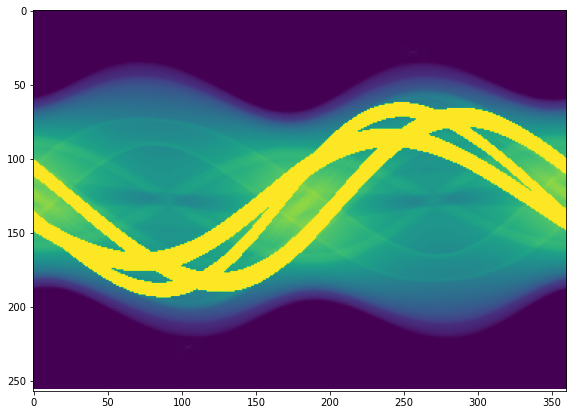

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.figure(figsize = (15, 7))
plt.imshow(df.T)
plt.colorbar;

# 이미지의 가로로 index 100 부분 슬라이싱

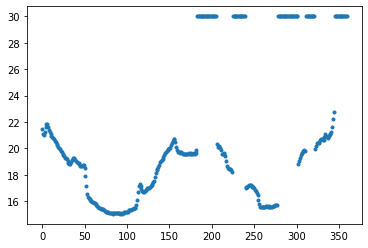

In [8]:
plt.plot(df.iloc[:, 100], '.');

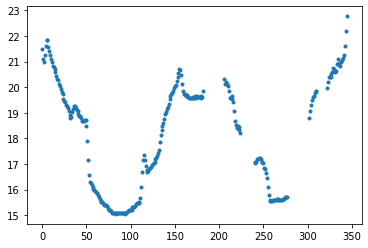

In [9]:
plt.plot(df.drop(list(df[df.iloc[:, 100] == 30].index)).iloc[:, 100], '.');

In [10]:
import numpy as np
X = np.array([[i] for i in list(df.drop(list(df[df.iloc[:, 100] == 30].index)).iloc[:, 100].index)])
y = np.array([df.drop(list(df[df.iloc[:, 100] == 30].index)).iloc[:, 100][i] for i in X[:, 0]])

In [11]:
X.shape, y.shape

((272, 1), (272,))

Text(0.5, 1.0, 'High-variance model: Overfits the data')

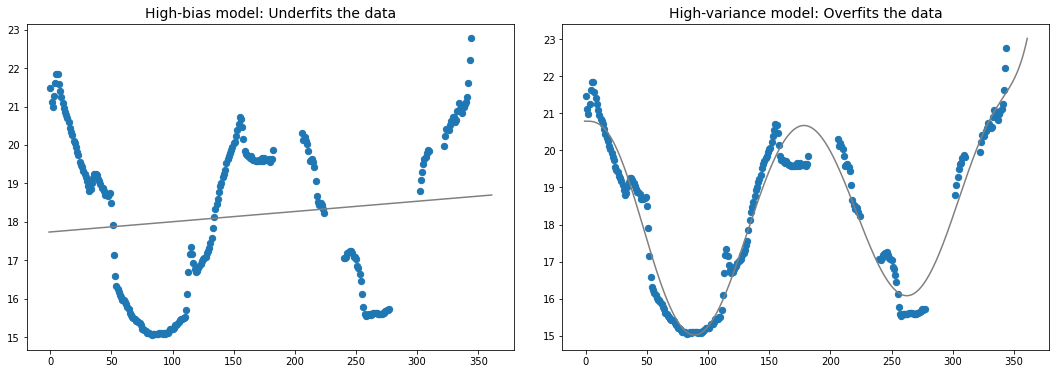

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

xfit = np.linspace(-1, 361, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model8 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model8.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Overfits the data', size=14)

# 세로로 슬라이싱

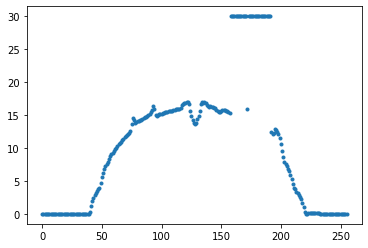

In [13]:
plt.plot(df.iloc[100, :], '.');

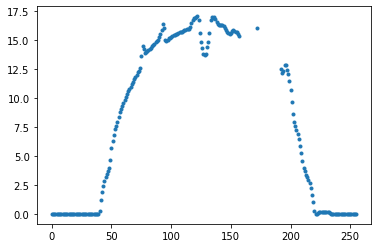

In [14]:
plt.plot(df.iloc[100, :].drop(list(df.iloc[100, :][df.iloc[100, :] == 30].index)), '.');

In [15]:
(df.isnull().count() != 360).value_counts()

False    257
dtype: int64

In [16]:
X_frame = df.iloc[100, :].drop(list(df.iloc[100, :][df.iloc[100, :] == 30].index))

import numpy as np
X = np.array([[i] for i in list(X_frame.index)])
y = np.array([X_frame[i] for i in X[:, 0]])

In [17]:
X.shape, y.shape

((224, 1), (224,))

In [18]:
y[-1] = 0

Text(0.5, 1.0, 'High-variance model: Overfits the data')

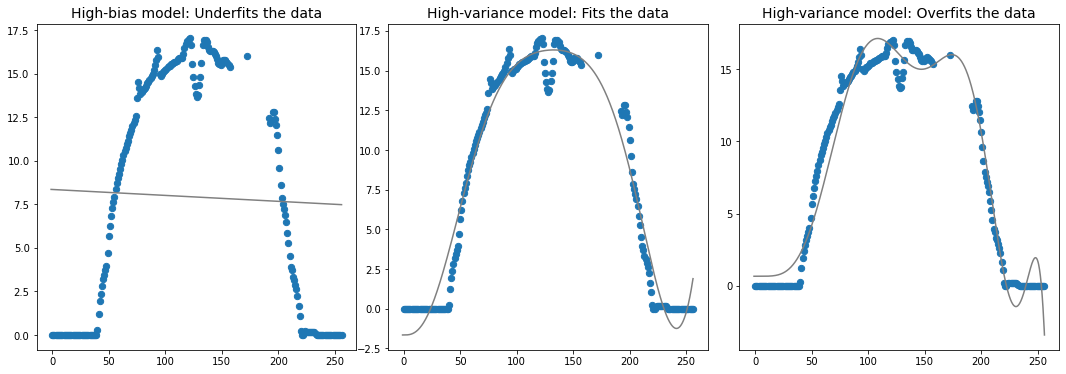

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

xfit = np.linspace(-1, 256, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)
model3 = PolynomialRegression(10).fit(X, y)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

ax[2].scatter(X.ravel(), y, s=40)
ax[2].plot(xfit.ravel(), model3.predict(xfit), color='gray')
ax[2].set_title('High-variance model: Overfits the data', size=14)

# 한 줄 씩 슬라이싱 해서 맞춰 보는 방식을 쓰기엔 그림이 이쁘지 않음.
30인 부위가 나오면 그 전 부분을 가져와 예측 해보는건 어떨지

In [20]:
value_30 = [i for i, j in zip(range(256), (df.iloc[100] == 30)) if j == True]

30인 값 뒤로 20개 그래프로 시각화

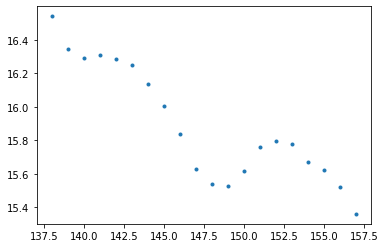

In [21]:
plt.plot(df.iloc[100][value_30[0] - 20 : value_30[0]], '.');

Text(0.5, 1.0, 'High-variance model: Fits the data')

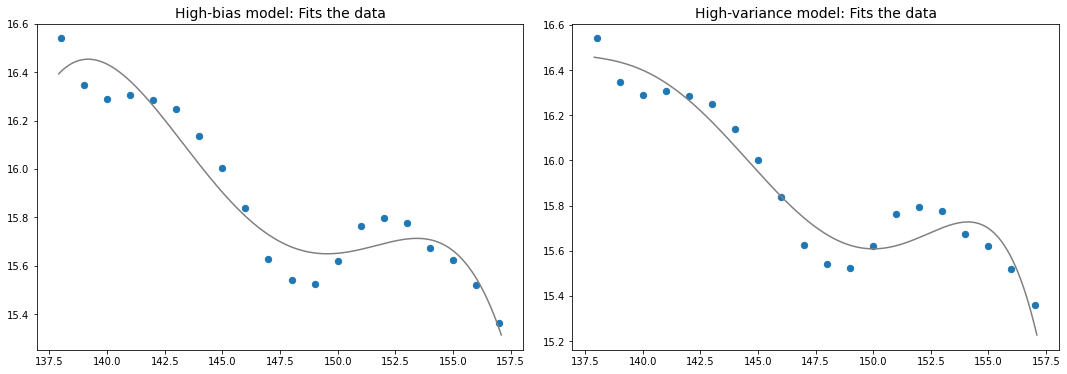

In [22]:
X_frame = df.iloc[100][value_30[0] - 20 : value_30[0]]

import numpy as np
X = np.array([[i] for i in list(X_frame.index)])
y = np.array([X_frame[i] for i in X[:, 0]])

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

xfit = np.linspace(138 - 0.1, 157 + 0.1, 1000)[:, None]
model1 = PolynomialRegression(6).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Fits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

In [23]:
model1.predict([[158]])

array([15.00140091])

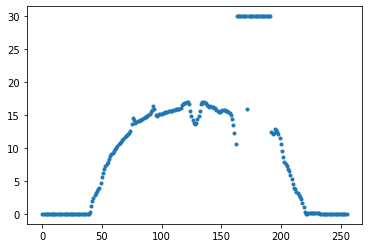

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

df = pd.read_table('./images/tooth3-3.txt',sep='\t', header = None)

dummy = df.iloc[100]
value_30 = [i for i, j in zip(range(256), (dummy == 30)) if j == True]

for i in value_30[:5]:
  X_frame = dummy[i - 20 : i]

  X = np.array([[i] for i in list(X_frame.index)])
  y = np.array([X_frame[i] for i in X[:, 0]])

  model = PolynomialRegression(6).fit(X, y)
  dummy[i] = model.predict([[i]])[0]
plt.plot(dummy, '.');

기울기가 급격하게 변하면서 다음 예측 범위로 갈때의 오차만큼 올라가다보니 차이가 더욱 심해짐

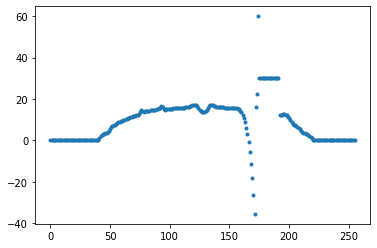

In [25]:
df = pd.read_table('./images/tooth3-3.txt',sep='\t', header = None)

dummy = df.iloc[100]
value_30 = [i for i, j in zip(range(256), (dummy == 30)) if j == True]

for i in value_30[:16]:
  X_frame = dummy[i - 20 : i]

  X = np.array([[i] for i in list(X_frame.index)])
  y = np.array([X_frame[i] for i in X[:, 0]])

  model = PolynomialRegression(6).fit(X, y)
  dummy[i] = model.predict([[i]])[0]
plt.plot(dummy, '.');

데이터의 증가량이 급격하게 올라가서 실패..

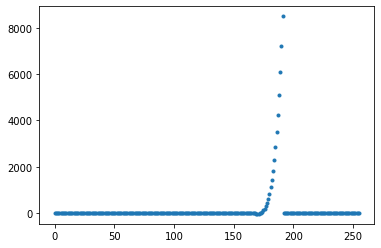

In [26]:
df = pd.read_table('./images/tooth3-3.txt',sep='\t', header = None)

dummy = df.iloc[100]
value_30 = [i for i, j in zip(range(256), (dummy == 30)) if j == True]

for i in value_30:
  X_frame = dummy[i - 20 : i]

  X = np.array([[i] for i in list(X_frame.index)])
  y = np.array([X_frame[i] for i in X[:, 0]])

  model = PolynomialRegression(6).fit(X, y)
  dummy[i] = model.predict([[i]])[0]
plt.plot(dummy, '.');

# 30인 값 뒤에 나오는 정상적인 값 하나 더 놔두면 limit가 정해지지 않을까 싶음

Text(0.5, 1.0, 'High-variance model: Fits the data')

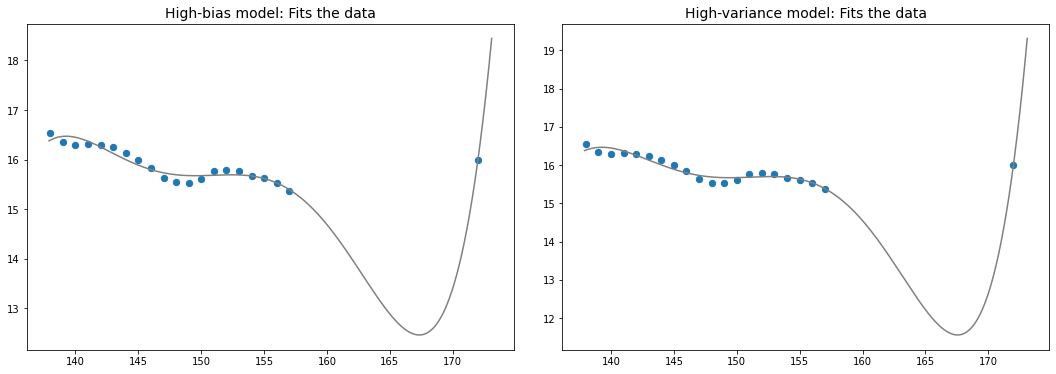

In [95]:
df = pd.read_table('./images/tooth3-3.txt',sep='\t', header = None)

X_frame = df.iloc[100][value_30[0] - 20 : value_30[0]]

import numpy as np
X = np.array([[i] for i in list(X_frame.index)] + [[172]])
y = np.array([X_frame[i] for i in X[:-1, 0]] + [df.iloc[100][172]])

xfit = np.linspace(138 - 0.1, 173 + 0.1, 1000)[:, None]
model1 = PolynomialRegression(6).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Fits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

위처럼 채워 넣어 보겠습니다.

In [96]:
value_30[:14]

[158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171]

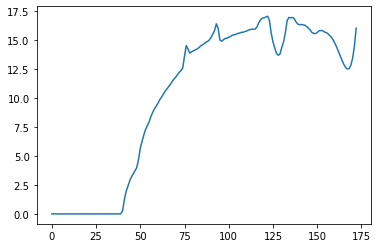

In [97]:
for i in value_30[:14]:
  df.iloc[100][i] = model1.predict([[i]])
plt.plot(df.iloc[100][:173]);

In [98]:
value_30[14:]

[173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191]

Text(0.5, 1.0, 'High-variance model: Fits the data')

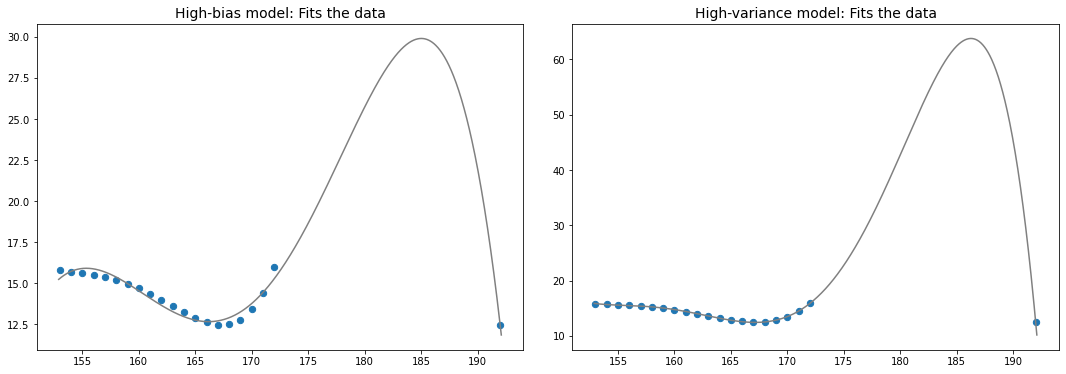

In [99]:
X_frame = df.iloc[100][value_30[14] - 20 : value_30[14]]

import numpy as np
X = np.array([[i] for i in list(X_frame.index)] + [[192]])
y = np.array([X_frame[i] for i in X[:-1, 0]] + [df.iloc[100][192]])

xfit = np.linspace(153 - 0.1, 192 + 0.1, 1000)[:, None]
model1 = PolynomialRegression(6).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Fits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

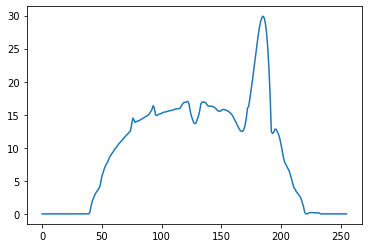

In [100]:
for i in value_30[14:]:
  df.iloc[100][i] = model1.predict([[i]])
plt.plot(df.iloc[100]);

처음 예측 부위 + 다음 예측 부위간의 오차가 커지면 그만큼 에러가 가중되서 심한 차이가 일어남.

Text(0.5, 1.0, 'High-variance model: Fits the data')

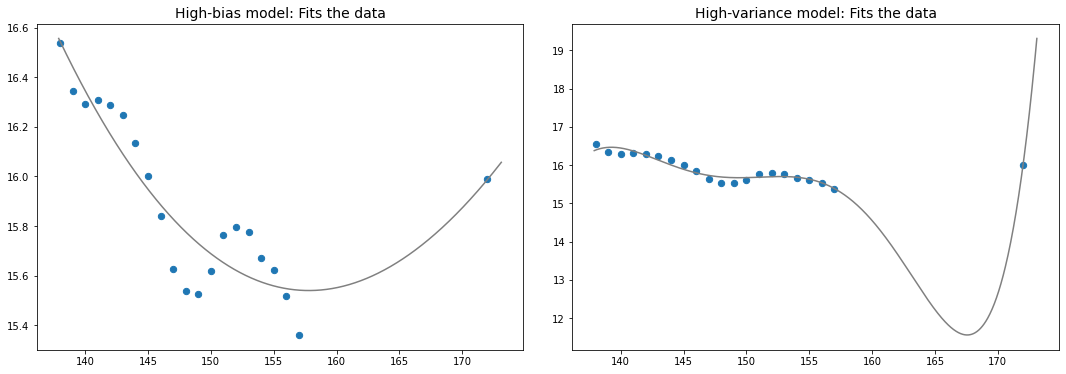

In [101]:
df = pd.read_table('./images/tooth3-3.txt',sep='\t', header = None)

X_frame = df.iloc[100][value_30[0] - 20 : value_30[0]]

import numpy as np
X = np.array([[i] for i in list(X_frame.index)] + [[172]])
y = np.array([X_frame[i] for i in X[:-1, 0]] + [df.iloc[100][172]])

xfit = np.linspace(138 - 0.1, 173 + 0.1, 1000)[:, None]
model1 = PolynomialRegression(3).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Fits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

Text(0.5, 1.0, 'High-variance model: Fits the data')

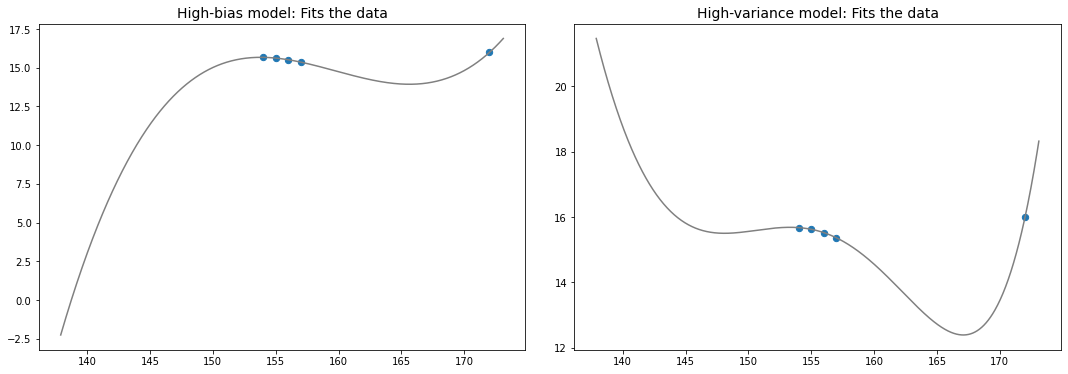

In [102]:
df = pd.read_table('./images/tooth3-3.txt',sep='\t', header = None)

X_frame = df.iloc[100][value_30[0] - 4 : value_30[0]]

import numpy as np
X = np.array([[i] for i in list(X_frame.index)] + [[172]])
y = np.array([X_frame[i] for i in X[:-1, 0]] + [df.iloc[100][172]])

xfit = np.linspace(138 - 0.1, 173 + 0.1, 1000)[:, None]
model1 = PolynomialRegression(3).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Fits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

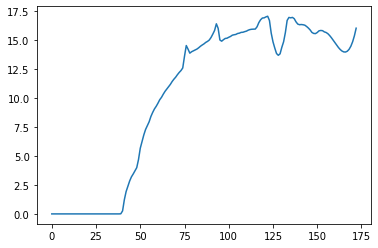

In [103]:
for i in value_30[:14]:
  df.iloc[100][i] = model1.predict([[i]])
plt.plot(df.iloc[100][:173]);

Text(0.5, 1.0, 'High-variance model: Fits the data')

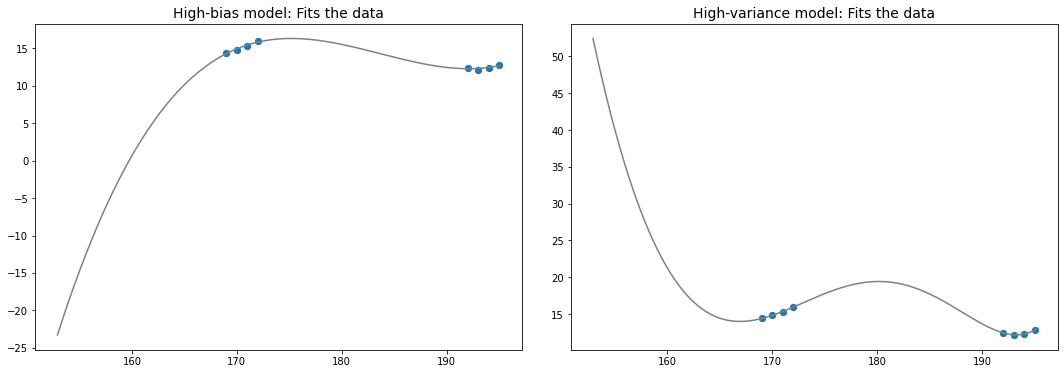

In [111]:
X_frame = df.iloc[100][value_30[14] - 4 : value_30[14]]

import numpy as np
X = np.array([[i] for i in list(X_frame.index)] + [[192]] +[[193]] + [[194]] + [[195]])
y = np.array([X_frame[i] for i in X[:-4, 0]] + [df.iloc[100][192]]  + [df.iloc[100][193]] + [df.iloc[100][194]] + [df.iloc[100][195]])

xfit = np.linspace(153 - 0.1, 195 + 0.1, 1000)[:, None]
model1 = PolynomialRegression(3).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Fits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

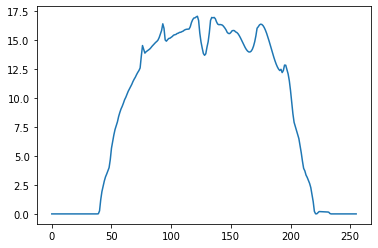

In [112]:
for i in value_30[14:]:
  df.iloc[100][i] = model1.predict([[i]])
plt.plot(df.iloc[100]);

Text(0.5, 1.0, 'High-variance model: Fits the data')

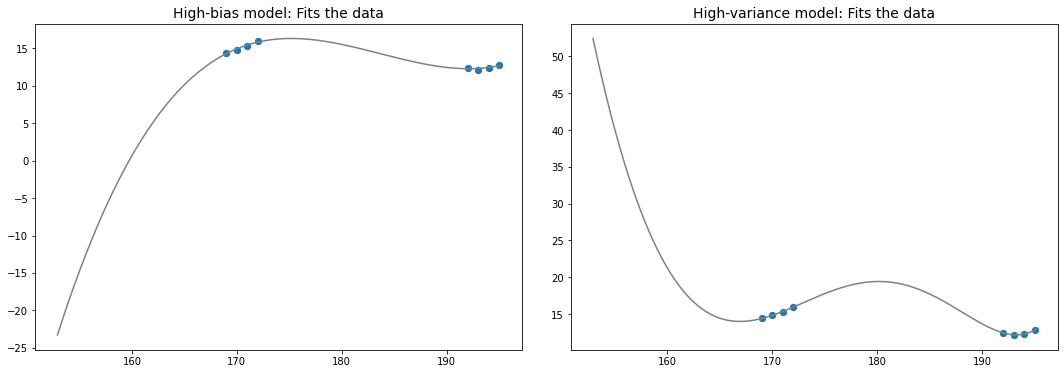

In [113]:
X_frame = df.iloc[100][value_30[14] - 4 : value_30[14]]

import numpy as np
X = np.array([[i] for i in list(X_frame.index)] + [[192]] +[[193]] + [[194]] + [[195]])
y = np.array([X_frame[i] for i in X[:-4, 0]] + [df.iloc[100][192]]  + [df.iloc[100][193]] + [df.iloc[100][194]] + [df.iloc[100][195]])

xfit = np.linspace(153 - 0.1, 195 + 0.1, 1000)[:, None]
model1 = PolynomialRegression(3).fit(X, y)
model2 = PolynomialRegression(8).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].set_title('High-bias model: Fits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray')
ax[1].set_title('High-variance model: Fits the data', size=14)

# LSTM 

In [33]:
plt.imshow(result_img)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/1_training_img.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

NameError: ignored

# CNN

In [ ]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:30])
plt.colorbar

In [ ]:
plt.figure(1)
x = range(0,256)
y = [metal0_img[v,8] for v in x]
plt.plot(x, y, 'ro')
plt.figure(2)
x = range(0,256)
y = [metal3_img[v,8] for v in x]
plt.plot(x, y, 'ro')

3개 반복.

In [ ]:
plt.figure(figsize=(8,12))
plt.imshow(metal0_img[:,0:30])
plt.colorbar

In [ ]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:360])
plt.colorbar

# RNN

3개 

up-down

In [ ]:
plt.figure(figsize=(8,12))
plt.imshow(test_img[:,0:360])
plt.colorbar

# RCNN

In [ ]:
plt.figure(figsize=(8,12))
plt.imshow(test_img[:,0:120])
plt.colorbar

In [ ]:
plt.figure(figsize=(8,12))
plt.imshow(test_img[:,0:120])
plt.colorbar

# DCGan
[Git Link](https://github.com/KyungRyeolBaek/study/blob/main/AI%20study/%EC%B9%98%EC%95%84/gan/dcgan-Copy1.ipynb)

# Image Handling

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

In [ ]:
plt.imshow(warped)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/warped.jpg', bbox_inches = 'tight', pad_inches=0, dpi=100)